# Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


# Download Data

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-09-17 17:41:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.128, 173.194.214.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2021-09-17 17:41:09 (90.2 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [3]:
data = open('/tmp/irish-lyrics-eof.txt').read()
type(data)

str

In [5]:
data[:100]

'Come all ye maidens young and fair\nAnd you that are blooming in your prime\nAlways beware and keep yo'

In [8]:
corpus = data.lower().split('\n')
print(len(corpus))
print(type(corpus))

1693
<class 'list'>


In [9]:
print(corpus[0:15])

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay']


# Tokenization

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [12]:
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

# Create Sequences

In [13]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]

  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)


print(len(input_sequences))

12038


In [14]:
type(input_sequences)

list

In [15]:
input_sequences[:15]

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218],
 [272, 798],
 [272, 798, 2]]

# Pad Sequences

In [16]:
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(sequences=input_sequences,
                                         maxlen=max_sequence_len,
                                         padding='pre'))

In [17]:
type(input_sequences)

numpy.ndarray

In [18]:
input_sequences[:20]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   51,   12],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   51,   12,   96],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   51,   12,   96, 1217],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          51,   12,   96, 1217,   48],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   51,
          12,   96, 1217,   48,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   51,   12,
          96, 1217,   48,    2,   69],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    2,   11],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    2,   11,   15],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    2,   

# Create predictors & Labels

In [19]:
# xs = input_sequences[:,:-1]
# labels = input_sequences[:, -1]
xs, labels = input_sequences[:,:-1],  input_sequences[:,-1]


ys = tf.keras.utils.to_categorical(y=labels,
                                   num_classes=total_words)

In [20]:
xs[:10], labels[:10]

(array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,   51],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,   51,   12],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,   51,   12,   96],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           51,   12,   96, 1217],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   51,
           12,   96, 1217,   48],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,   51,   12,
           96, 1217,   48,    2],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    2],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    2,   11],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    2,   11,   15],
        [   0,    0

In [21]:
ys[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [22]:
corpus[0]

'come all ye maidens young and fair'

In [23]:

print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [24]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


# Create the Model

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words,
                              output_dim=64,
                              input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(LSTM(20)),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 64)            172160    
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                13600     
_________________________________________________________________
dense (Dense)                (None, 2690)              110290    
Total params: 296,050
Trainable params: 296,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(xs, ys, epochs=100)

Epoch 1/100
377/377 [==============================] - 7s 19ms/step - loss: 6.0484 - accuracy: 0.0692
Epoch 2/100
377/377 [==============================] - 7s 18ms/step - loss: 5.9606 - accuracy: 0.0709
Epoch 3/100
377/377 [==============================] - 7s 18ms/step - loss: 5.8805 - accuracy: 0.0768
Epoch 4/100
377/377 [==============================] - 7s 19ms/step - loss: 5.8063 - accuracy: 0.0835
Epoch 5/100
377/377 [==============================] - 7s 18ms/step - loss: 5.7369 - accuracy: 0.0889
Epoch 6/100
377/377 [==============================] - 7s 19ms/step - loss: 5.6672 - accuracy: 0.0925
Epoch 7/100
377/377 [==============================] - 7s 19ms/step - loss: 5.6016 - accuracy: 0.0932
Epoch 8/100
377/377 [==============================] - 7s 19ms/step - loss: 5.5313 - accuracy: 0.0959
Epoch 9/100
377/377 [==============================] - 7s 18ms/step - loss: 5.4640 - accuracy: 0.1030
Epoch 10/100
377/377 [==============================] - 6s 17ms/step - loss: 5.393

In [28]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  # plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  # plt.legend([string, 'val_'+string])
  plt.show()

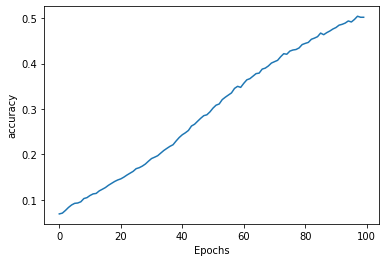

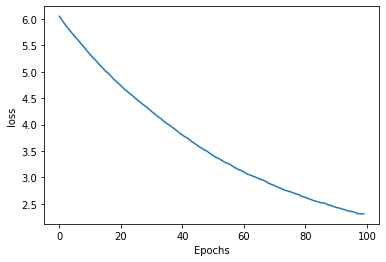

In [29]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Test the Model

In [30]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], 
                            maxlen=max_sequence_len-1, 
                            padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0))
 
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

Laurence went to dublin wives are take a drop in bay too ry sweeps down gently sea did fill lrelands creature revealing cloak beauty better wid holds windows jenny today stranger whisperings name answered havent crossed me and ground blue suits black black carriages haunt lass foam havent peoples the jar grief barney torn away cross the wind is soothed to smother there to smother to smother youve and creature revealing to greek to fulfill to smother there today to to smother revealing youve sinners in much thou guinea laughing honor stalwart creature steer slower steer other havent better nothing revealing cozy to guide
